In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

In [ ]:
batch_size = 64

# Transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download datasets
full_train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Split dataset: 50k for train, 10k for validation
train_size = 50000
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


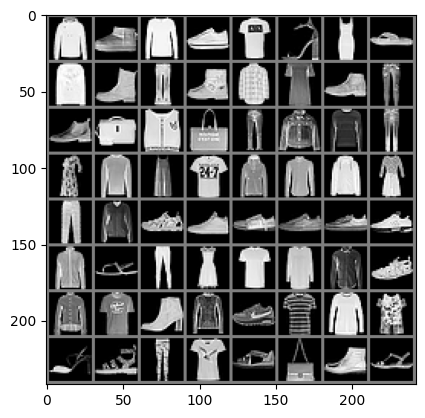

In [ ]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images,))

In [ ]:
class LeNet5(nn.Module):
    def __init__(self, use_dropout=False, use_batchnorm=False):
        super(LeNet5, self).__init__()
        self.use_dropout = use_dropout
        self.use_batchnorm = use_batchnorm
        
        self.conv1 = nn.Conv2d(1, 6, 5) #C1
        self.bn1 = nn.BatchNorm2d(6) if use_batchnorm else nn.Identity()
        self.pool = nn.AvgPool2d(2, 2) #S2 , #S4

        self.conv2 = nn.Conv2d(6, 16, 5) #C3
        self.bn2 = nn.BatchNorm2d(16) if use_batchnorm else nn.Identity()

        self.conv3 = nn.Conv2d(16, 120, 4) #C5
        
        self.bn3 = nn.BatchNorm1d(120) if use_batchnorm else nn.Identity()
        self.fc1 = nn.Linear(120, 84) #F6
        self.bn_fc1 = nn.BatchNorm1d(84) if use_batchnorm else nn.Identity()
        
        self.dropout = nn.Dropout(0.5) if use_dropout else nn.Identity()

        self.fc2 = nn.Linear(84, 10) #Output
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.conv3(x)
        x = torch.flatten(x, 1)
        x = self.bn3(x)
        x = self.dropout(self.relu(self.bn_fc1(self.fc1(x))))
        x = self.fc2(x)
        return x

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 120, kernel_size=(4, 4), stride=(1, 1))
  (bn3): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (bn_fc1): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
)
